In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('spam.csv' , encoding='ISO-8859-1')

In [3]:
df.sample(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
547,ham,"Sorry that took so long, omw now",NaN,NaN,NaN
3114,ham,I wait 4 Ì_ inside da car park...,NaN,NaN,NaN
4556,ham,I am in hospital da. . I will return home in e...,NaN,NaN,NaN
629,spam,Todays Vodafone numbers ending with 4882 are s...,NaN,NaN,NaN
2467,ham,Is there coming friday is leave for pongal?do ...,NaN,NaN,NaN
4590,spam,Well done ENGLAND! Get the official poly ringt...,NaN,NaN,NaN


In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


# DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# We can see that Column 2 ,3 and 4 only have few non-null value
# So they are not that much important for us
# SO we will remove them

In [7]:
df.drop(columns = ['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# OK , now we will change the name of the columns 

In [11]:
df.rename(columns ={'v1' : 'target' , 'v2' : 'text'}, inplace = True)

In [12]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [14]:
# OK , now for making it easy for the algorithms we have to encodes target

In [15]:
from  sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
df['target'] = encoder.fit_transform(df['target'])

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# HAM = 0 , SPAM = 1

In [19]:
# We will check the null instances

df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
# Now we will check for the Duplicates elemments

df.duplicated().sum()

403

In [21]:
# We will remove the duplicate elements

df = df.drop_duplicates(keep = 'first')

In [22]:
df.duplicated().sum()

0

In [23]:
# So we have done all the data cleaning

# EDA (Exploratory Data Analysis) 

In [24]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df.shape

(5169, 2)

In [26]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

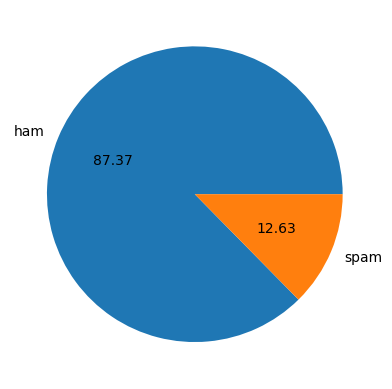

In [27]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts() , labels = ['ham','spam'] ,autopct="%0.2f")
plt.show()

In [28]:
# There is a huge gap between the numbers of ham and spam msgs

In [29]:
import nltk

In [30]:
!pip install nltk

In [31]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [32]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [33]:
# We will add a new feature of "nnum_chars" which include the nums of charcters in each text
df['num_chars'] = df['text'].apply(len)

In [34]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
# num of words in every text instace
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [36]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [37]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [38]:
# Now we will calculate the sentences in every text instance

df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [39]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [40]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [41]:
# OK , so now we have 3 new features num_chars , nnum_words and num_sentences
# Lets see some relations between them

In [42]:
df[['num_chars' , 'num_words' , 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
# Lets get this details sperately for SPAM and HAM

In [44]:
# for HAM

df[df['target'] == 0][['num_chars' , 'num_words' , 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [45]:
# for SPAM

df[df['target'] == 1][['num_chars' , 'num_words' , 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [46]:
# ahh! so we can clearly see here that there is a lot of differnece between Counts of Spam
# and HAM 
# bAsically the SPAM msgs have more charcaters  ,  words in them

In [47]:
# Now we will plot these difference 

In [48]:
import seaborn as sns

In [49]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='num_chars', ylabel='Count'>

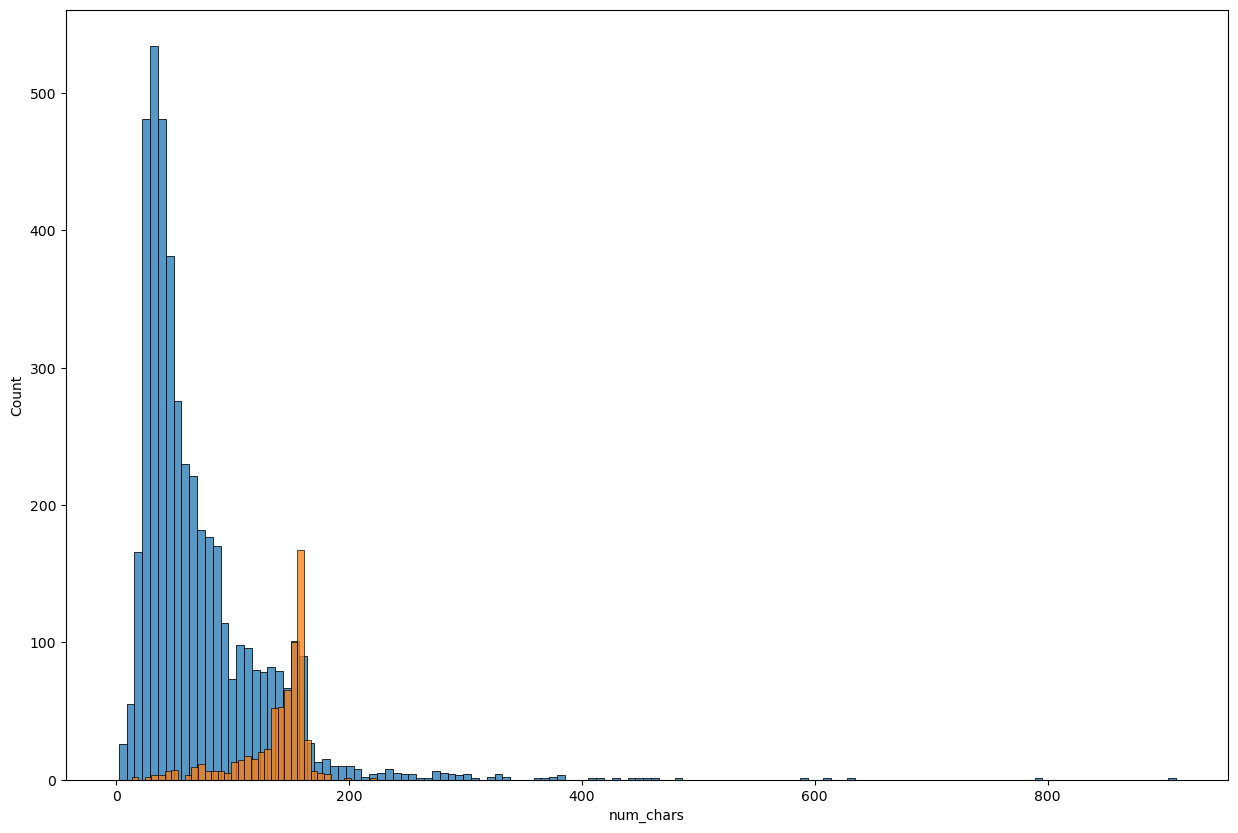

In [50]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['target'] == 0]['num_chars'])
sns.histplot(df[df['target'] == 1]['num_chars'])

<Axes: xlabel='num_words', ylabel='Count'>

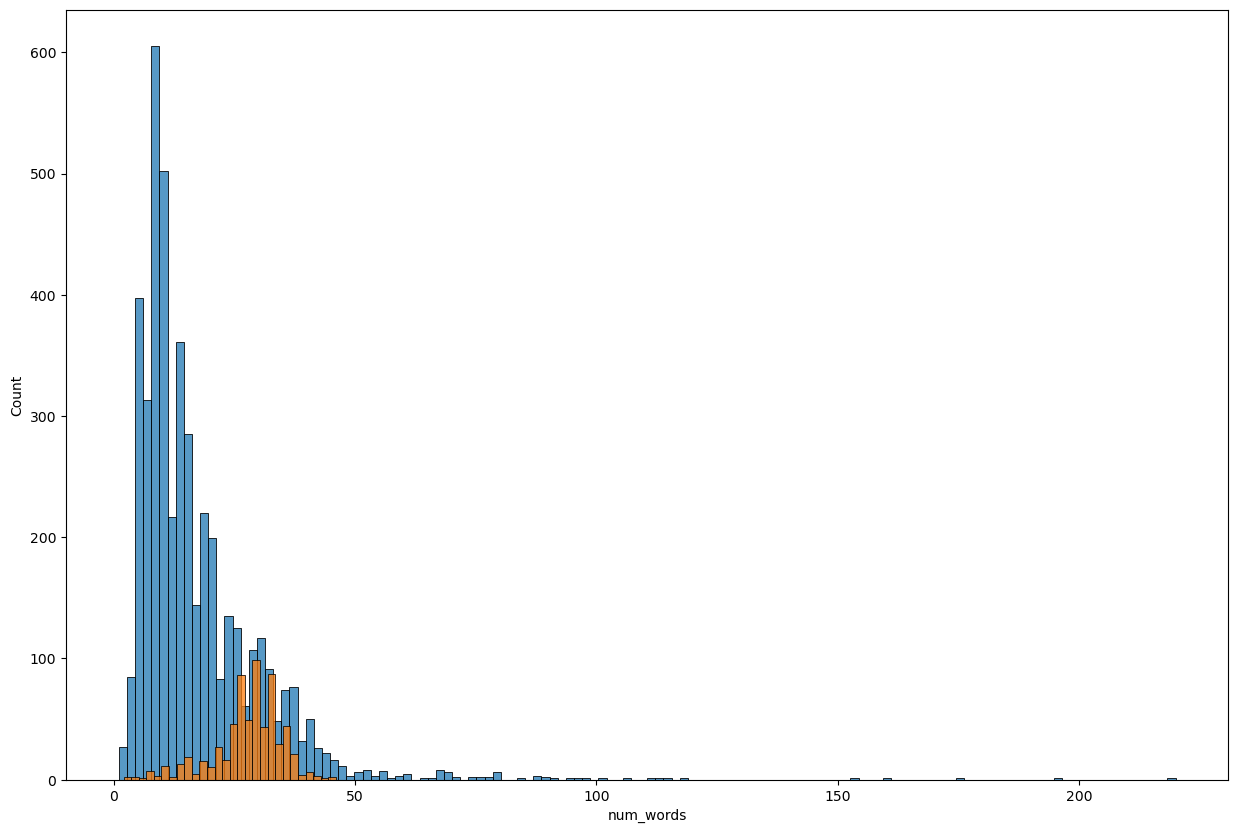

In [51]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']== 1]['num_words'])

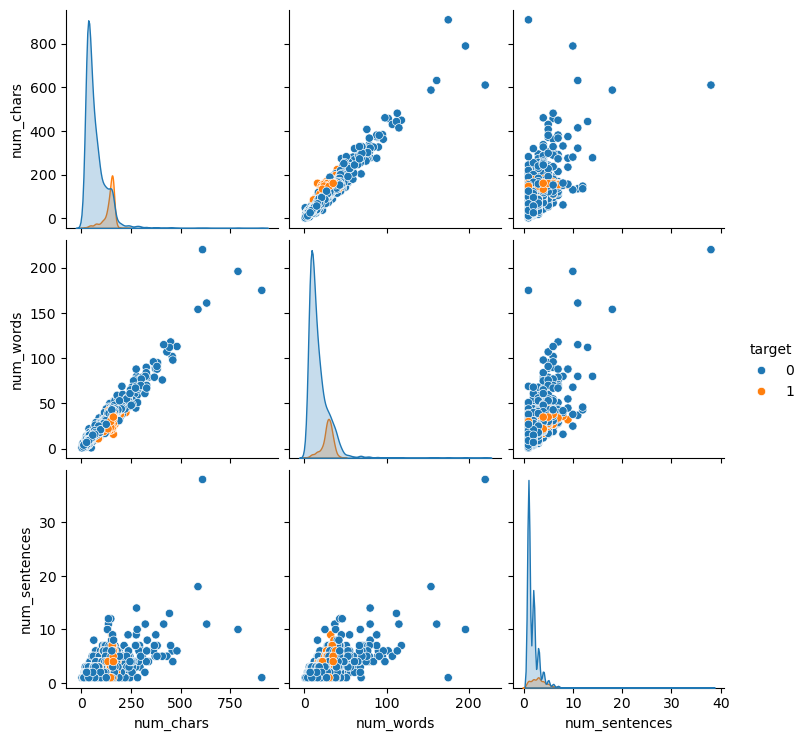

In [52]:
sns.pairplot(df, hue='target')

<Axes: >

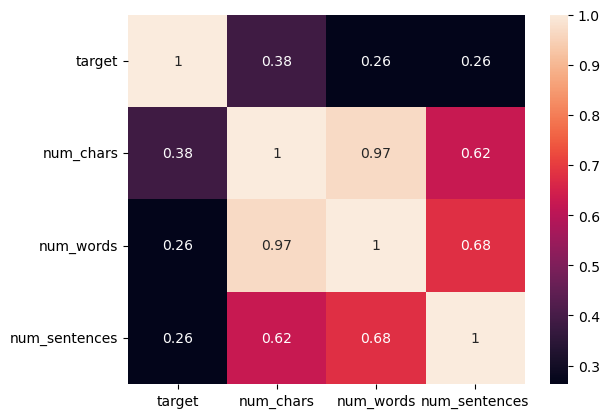

In [53]:
# Selecting only numeric features for the Heatmap
numeric_df = df.select_dtypes(include='number')

sns.heatmap(numeric_df.corr(),annot=True)

In [54]:
# In this HeatMap we can clearly see that , "num_chars" has the great impact on the "target"
# So we will use this featurre for further process

# Data Preprocessing

- Lower Case
- Tokenization (breaking the sentences into word)
- Removing Special Characters
- Removing stop word and Punctuation
- Stemming (Removing the 2nd and 3rd forms of verb , like 'ing' 'ed' )

In [55]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [56]:
import string

In [57]:
# Now we will do the ***Stemming***

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [58]:
# Example of stemming
print(ps.stem("Eating")  , " " ,  ps.stem("played") , " " , ps.stem("killing") )

eat   play   kill


In [59]:
# Main Function for data (text) transforming

def transform_data(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i  in text:
        # Only considering if i is Alphabet or a Number
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()


    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text =  y[:]
    y.clear()
    
    for i  in text:
        y.append(ps.stem(i))

    
    return " ".join(y)   # Changing the list 'y' into string 'y'

In [60]:
transform_data("KAY WBW hey you there Im here killing take it be %&O^*( ????")

'kay wbw hey im kill take'

In [61]:
df['transformed_text'] = df['text'].apply(transform_data)

In [62]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [63]:
# Now we Visualize the most used word in SPAM and HAM

In [64]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [65]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=""))

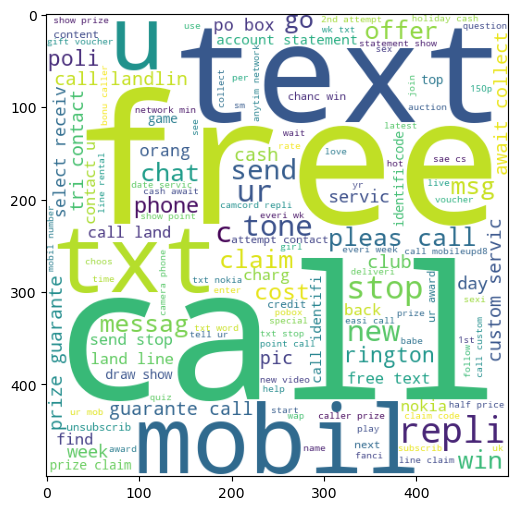

In [66]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [67]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

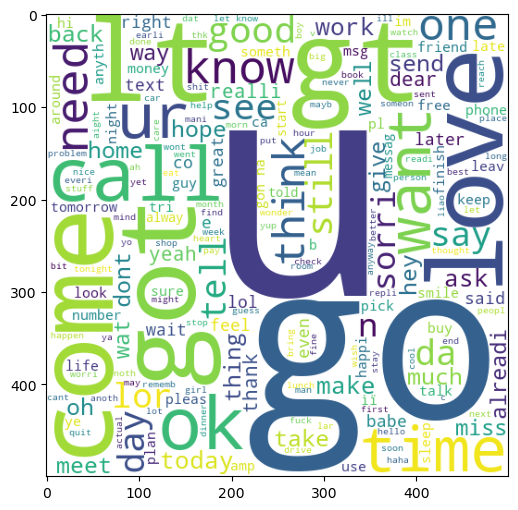

In [68]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [69]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [70]:
len(spam_corpus)

9939

In [71]:
from collections import Counter

In [72]:
Counter(spam_corpus).most_common(10)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

In [73]:
pd.DataFrame(Counter(spam_corpus).most_common(10))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [74]:
ham_corpus= []
for i in df[df['target']==0]['transformed_text'].tolist():
    for j in i.split():
        ham_corpus.append(j)

In [75]:
len(ham_corpus)

35404

In [76]:
Counter(ham_corpus).most_common(20)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165)]

In [77]:
pd.DataFrame(Counter(ham_corpus).most_common(20))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [78]:
df.head(10)

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


<!-- MODEL BUILDING -->

# MODEL BUILDING

In [177]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [178]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [179]:
X = tfidf.fit_transform(df['text']).toarray()

In [180]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [181]:
X.shape

(5169, 3000)

In [182]:
y = df['target'].values

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
X_train , X_test , y_train ,y_test = train_test_split(X, y , test_size = 0.2  ,random_state= 42)

In [185]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB

from sklearn.metrics import accuracy_score ,confusion_matrix , precision_score

In [186]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [187]:
# Using Gaussian Naive Bayes

gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)

print(f"Accuracy Score  = {accuracy_score(y_test , y_pred1):.2f}" )
print("Confucion Metrics = " , confusion_matrix(y_test , y_pred1))
print(f"precision Score = {precision_score(y_test , y_pred1):.2f}")

Accuracy Score  = 0.89
Confucion Metrics =  [[797  92]
 [ 21 124]]
precision Score = 0.57


In [188]:
# Using Multinomial Naive Bayes

mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)

print(f"Accuracy Score = {accuracy_score(y_test , y_pred2):.2f}")
print(f"Confusion Matrix = {confusion_matrix(y_test , y_pred2)}")
print(f"Precision Score = {precision_score(y_test  ,y_pred2):.2f}")

Accuracy Score = 0.98
Confusion Matrix = [[889   0]
 [ 24 121]]
Precision Score = 1.00


In [189]:
# Using Bernaulli Naive Bayes

bnb.fit(X_train , y_train)
y_pred3 = bnb.predict(X_test)

print(f"Accuracy Score = {accuracy_score(y_test , y_pred3):.2f}")
print(f"Confusion Matrix = {confusion_matrix(y_test , y_pred3)}")
print(f"Precision Score  = {precision_score(y_test , y_pred3):.2f}")

Accuracy Score = 0.98
Confusion Matrix = [[887   2]
 [ 16 129]]
Precision Score  = 0.98


In [190]:
# Here we can see that the we got Precision Score of "1" and best accuracy

# So we will go for  ***Multinomial Naive Bays****

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble  import GradientBoostingClassifier
from xgboost import XGBClassifier

In [192]:
svc = SVC(kernel='sigmoid' , gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear' , penalty='l1')
rfc = RandomForestClassifier(n_estimators=50 , random_state=2)
abc = AdaBoostClassifier(n_estimators=50 , random_state=2)
bc = BaggingClassifier(n_estimators=50  ,random_state=2)
etc= ExtraTreesClassifier(n_estimators=50 , random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50 , random_state=2)
xgb = XGBClassifier(n_estimators =50 , random_state=2)

In [193]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb ,
    'DT' : dtc , 
    'LR' : lrc ,
    'RF' : rfc ,
    'AdaBoost' : abc ,
    'Bgc' : bc ,
    'ETC' : etc ,
    'GBDT' : gbdt ,
    'xgb' : xgb
}

In [194]:
def train_classifier(clf , X_train ,y_train , X_test ,y_test):
    clf.fit(X_train ,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test , y_pred)
    precision = precision_score(y_test , y_pred)

    return accuracy ,precision

In [195]:
train_classifier(svc ,X_train,y_train , X_test ,y_test)

(0.9874274661508704, 0.9782608695652174)

In [196]:
accuracy_scores = []
precision_scores = []

for name ,clf in clfs.items():
    current_accuracy , current_precision = train_classifier(clf , X_train , y_train ,X_test , y_test)

    print(f"For {name}")
    print(f"Accuracy - {current_accuracy:.3f}")
    print(f"Precision - {current_precision:.3f}")

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy - 0.987
Precision - 0.978
For KN
Accuracy - 0.913
Precision - 1.000
For NB
Accuracy - 0.977
Precision - 1.000
For DT
Accuracy - 0.952
Precision - 0.961
For LR
Accuracy - 0.964
Precision - 0.929
For RF
Accuracy - 0.978
Precision - 0.984
For AdaBoost
Accuracy - 0.972
Precision - 0.953
For Bgc
Accuracy - 0.978
Precision - 0.962
For ETC
Accuracy - 0.984
Precision - 0.992
For GBDT
Accuracy - 0.958
Precision - 0.990
For xgb
Accuracy - 0.973
Precision - 0.968


In [197]:
performance_df = pd.DataFrame({'Algorithms' : clfs.keys() ,'Precision' : precision_scores ,'Accuracy' : accuracy_scores})

In [198]:
performance_df

,Algorithms,Precision,Accuracy
0,SVC,0.978261,0.987427
1,KN,1.000000,0.912959
2,NB,1.000000,0.976789
3,DT,0.961165,0.951644
4,LR,0.928571,0.964217
5,RF,0.984127,0.977756
6,AdaBoost,0.953125,0.971954
7,Bgc,0.962121,0.977756
8,ETC,0.992308,0.983559
9,GBDT,0.990385,0.958414


In [199]:
performance_df_sorted = performance_df.sort_values(by="Precision" ,ascending = False)

In [200]:
performance_df_sorted

,Algorithms,Precision,Accuracy
1,KN,1.000000,0.912959
2,NB,1.000000,0.976789
8,ETC,0.992308,0.983559
9,GBDT,0.990385,0.958414
5,RF,0.984127,0.977756
0,SVC,0.978261,0.987427
10,xgb,0.968000,0.972921
7,Bgc,0.962121,0.977756
3,DT,0.961165,0.951644
6,AdaBoost,0.953125,0.971954


In [201]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithms")

In [202]:
performance_df1

,Algorithms,variable,value
0,SVC,Precision,0.978261
1,KN,Precision,1.000000
2,NB,Precision,1.000000
3,DT,Precision,0.961165
4,LR,Precision,0.928571
5,RF,Precision,0.984127
6,AdaBoost,Precision,0.953125
7,Bgc,Precision,0.962121
8,ETC,Precision,0.992308
9,GBDT,Precision,0.990385


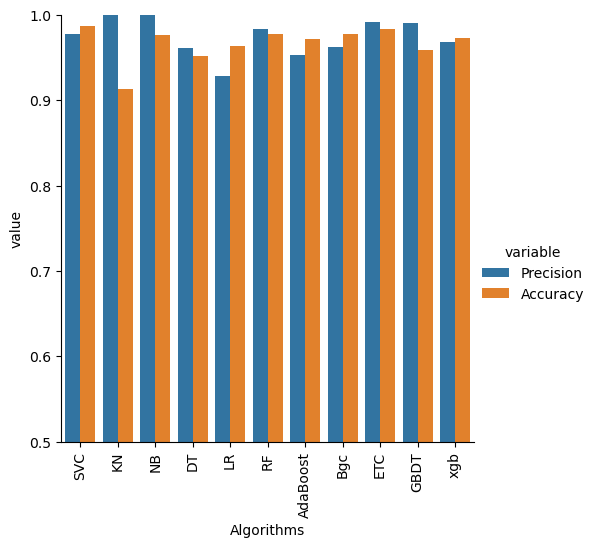

In [203]:
sns.catplot(x = 'Algorithms' , y= 'value', hue = 'variable' , data = performance_df1,
           kind='bar' , height=5)
plt.ylim(0.5 , 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [153]:
# Now we will try with Voting Classifier

svc = SVC(kernel='sigmoid' , gamma=1.0 , probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50 ,random_state=2)

In [154]:
from sklearn.ensemble import VotingClassifier

In [157]:
voting = VotingClassifier(estimators=[('svm' , svc) , ('nb' , mnb) , ('et' , etc)] , voting='soft')

In [158]:
voting.fit(X_train , y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [159]:
y_pred = voting.predict(X_test)

In [161]:
print(f"Accuracy = {accuracy_score(y_test , y_pred):.3f}")
print(f"Precision = {precision_score(y_test , y_pred):.3f}")

Accuracy = 0.986
Precision = 0.992


In [162]:
# Not as well as the Multinomial Naive Bays

In [166]:
# Now we will try with stacking

estimators = [('svm' , svc) , ('nb' , mnb) , ('et' , etc)]
final_estimator  = RandomForestClassifier()

In [167]:
from sklearn.ensemble import StackingClassifier

In [168]:
clf = StackingClassifier(estimators =estimators , final_estimator = final_estimator)

In [169]:
clf.fit(X_train , y_train)

StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [171]:
y_pred = clf.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test , y_pred):.3f}")
print(f"Precision = {precision_score(y_test , y_pred):.3f}")

Accuracy = 0.987
Precision = 0.978


- so we can see here that no other classifier gives a  good accuracy with 100 % Precison

- -so we will go with "MULTINOMIAL NAIVE BAYS" 

# Saving the Model

In [204]:
import pickle
pickle.dump(tfidf , open('vectorizer.pkl' , 'wb'))
pickle.dump(mnb , open('model.pkl' , 'wb'))

In [233]:
df[df['target'] ==1].sample(10)

,target,text,num_chars,num_words,num_sentences,transformed_text
647,1,PRIVATE! Your 2003 Account Statement for shows...,136,23,3,privat 2003 account statement show 800 point c...
880,1,Reminder: You have not downloaded the content ...,127,27,4,remind download content alreadi paid goto http...
1573,1,SMS AUCTION - A BRAND NEW Nokia 7250 is up 4 a...,149,31,4,sm auction brand new nokia 7250 4 auction toda...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...
1506,1,Thanks for the Vote. Now sing along with the s...,121,27,3,thank vote sing along star karaok mobil free l...
2988,1,No 1 POLYPHONIC tone 4 ur mob every week! Just...,147,35,6,1 polyphon tone 4 ur mob everi week txt pt2 87...
4726,1,Had your mobile 10 mths? Update to the latest ...,143,30,4,mobil 10 mth updat latest phone free keep ur n...
318,1,December only! Had your mobile 11mths+? You ar...,157,30,4,decemb mobil entitl updat latest colour camera...
843,1,Urgent! call 09066350750 from your landline. Y...,153,31,3,urgent call 09066350750 landlin complimentari ...
4458,1,Welcome to UK-mobile-date this msg is FREE giv...,151,30,3,welcom msg free give free call futur mg bill 1...


In [234]:
print(df.loc[5566]['text'])

REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode


In [231]:
df.shape

(5169, 6)